Epoch 1/10
203/203 [==============================] - 8s 29ms/step - loss: 0.7705 - accuracy: 0.5096 - val_loss: 0.6786 - val_accuracy: 0.6084
Epoch 2/10
203/203 [==============================] - 6s 28ms/step - loss: 0.6317 - accuracy: 0.6517 - val_loss: 0.6435 - val_accuracy: 0.6182
Epoch 3/10
203/203 [==============================] - 6s 29ms/step - loss: 0.5035 - accuracy: 0.7663 - val_loss: 0.6936 - val_accuracy: 0.6182
Epoch 4/10
203/203 [==============================] - 6s 30ms/step - loss: 0.4050 - accuracy: 0.8279 - val_loss: 0.7786 - val_accuracy: 0.6145
Epoch 5/10
64/64 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.6291
Test Accuracy: 0.6290640234947205


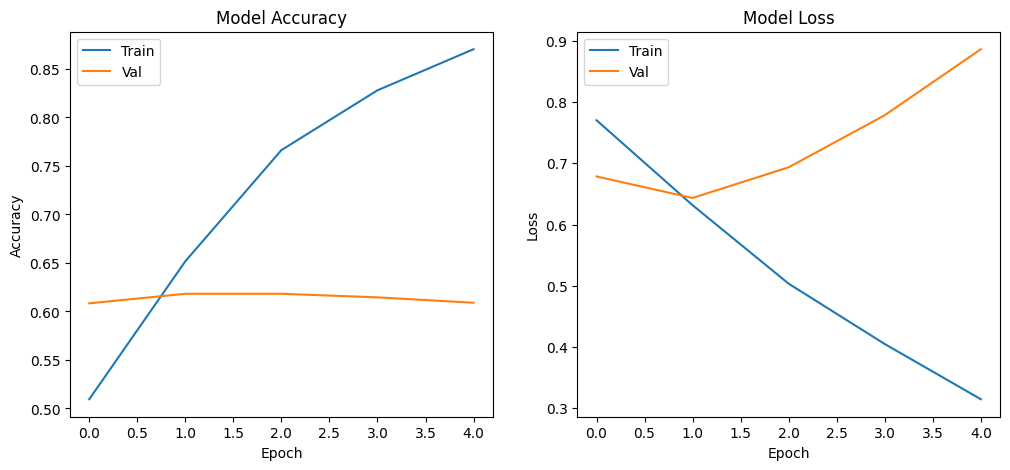

1/1 [==============================] - 0s 147ms/step
Positive Comment


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_words)

# Importing dataset from Excel
df = pd.read_excel(r"D:\Datasets\Hate_comments.xlsx")

# Encoding the target variable
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Apply preprocessing
df['Comment'] = df['Comment'].apply(preprocess)

# Split training and testing sets
X = df['Comment']
Y = df['Label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vectorize the text data using Tfidf
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train).toarray()
x_test_tfidf = vectorizer.transform(x_test).toarray()

# Building the ANN Model
model = Sequential()
model.add(Dense(128, input_shape=(x_train_tfidf.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes: Hate, Neutral, Positive

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tfidf, y_test)
print("Test Accuracy:", accuracy)

# Visualize training process
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

# Predicting the sentiment of new input
pred = ['The only thing we know for sure is both sides say they want a deal, but both say not at any price']
pred_tfidf = vectorizer.transform(pred).toarray()
predicted_label = model.predict(pred_tfidf)
predicted_class = predicted_label.argmax(axis=1)

# Output result
if predicted_class[0] == 0:
    print("Hate Comment")
elif predicted_class[0] == 1:
    print("Neutral Comment")
else:
    print("Positive Comment")
